In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import linkage,cophenet,dendrogram,fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score
%matplotlib inline

In [3]:
## Load the Iris Data
data=load_iris()

In [4]:
## Create a dataframe from the Iris Data
X=pd.DataFrame(data=data.data,columns=data.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


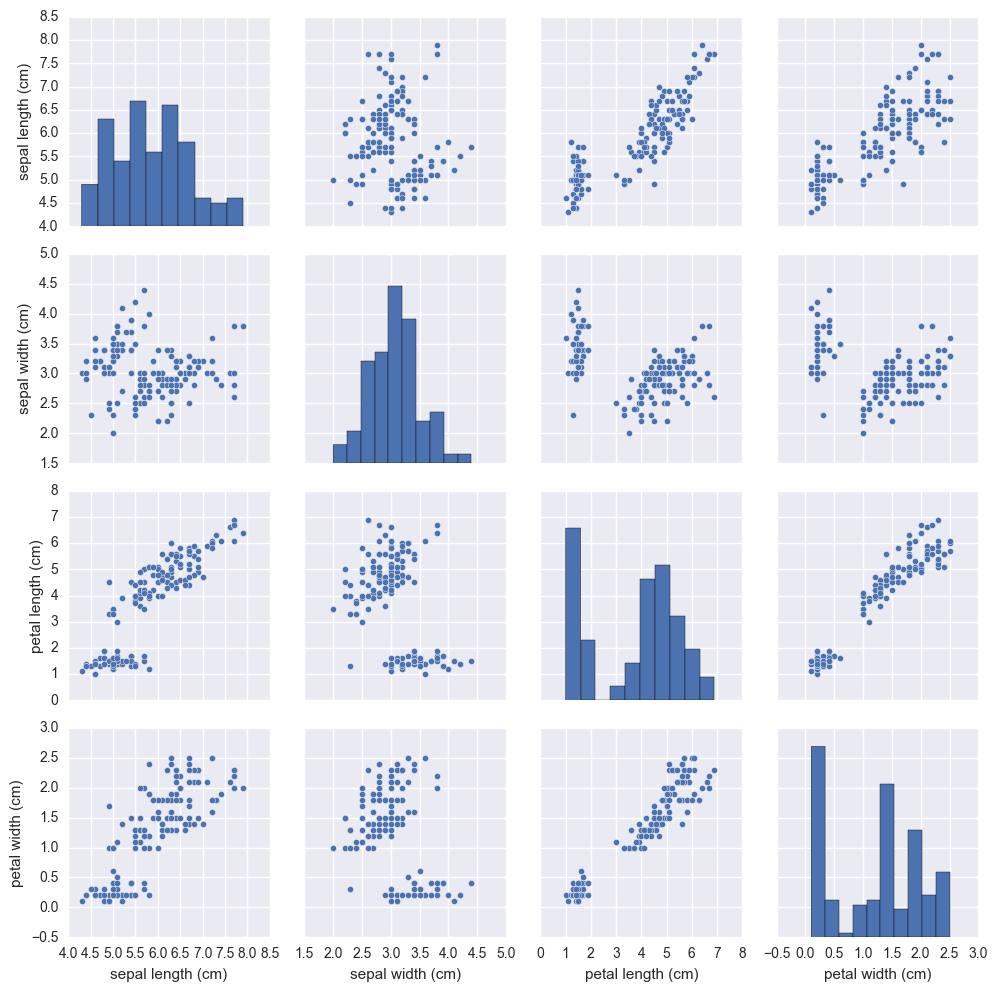

In [6]:
## A quick pair plot to get a feel of the distributions and relationships between the features and what clusters might
## be expected.
sns.pairplot(X)

In [7]:
## There are two clear clusters in the majority of the graphs with a possibly a third where there seems to 
## be two pockets of higher denisty in the larger group in the sepal length vs petal length graph. If three clusters
## are selected I expect there to be a bit of an overlap between the clusters.

In [8]:
## I will use hierarchical clustering  for this dataset as this will allow me to clearly see the variation of the 
## data and  the 'distance' between clusters.
## Hierarchical clustering clusters the data in a bottom up fashion, it finds the closest two data points and 
## clusters these first, it then creates a new centroid between these points and finds the closest point to this 
## centroid and adds it to the cluster, meanwhile it looks for other data points that are similarly close and 
## repeats the process. Eventually all of the points are joined up into one clusters, however you can choose 
## cophenetic distance between clusters which is too large and should form separate clusters. Therefore the intial
## cluster point cannot be selected, however this should have no impact on this method due to the nature of bottom up
## clustering exaplined above. This is not the case for other clustering methods such as Kmeans or DBSCAN. 

Z = linkage(X, 'ward')
c, coph_dists = cophenet(Z, pdist(X))
print c

0.872601525064


In [9]:
## As the cophentic coefficent is quite high, is shows that the Dendrogram distance ratios will be close to the 
## original distances between clusters.

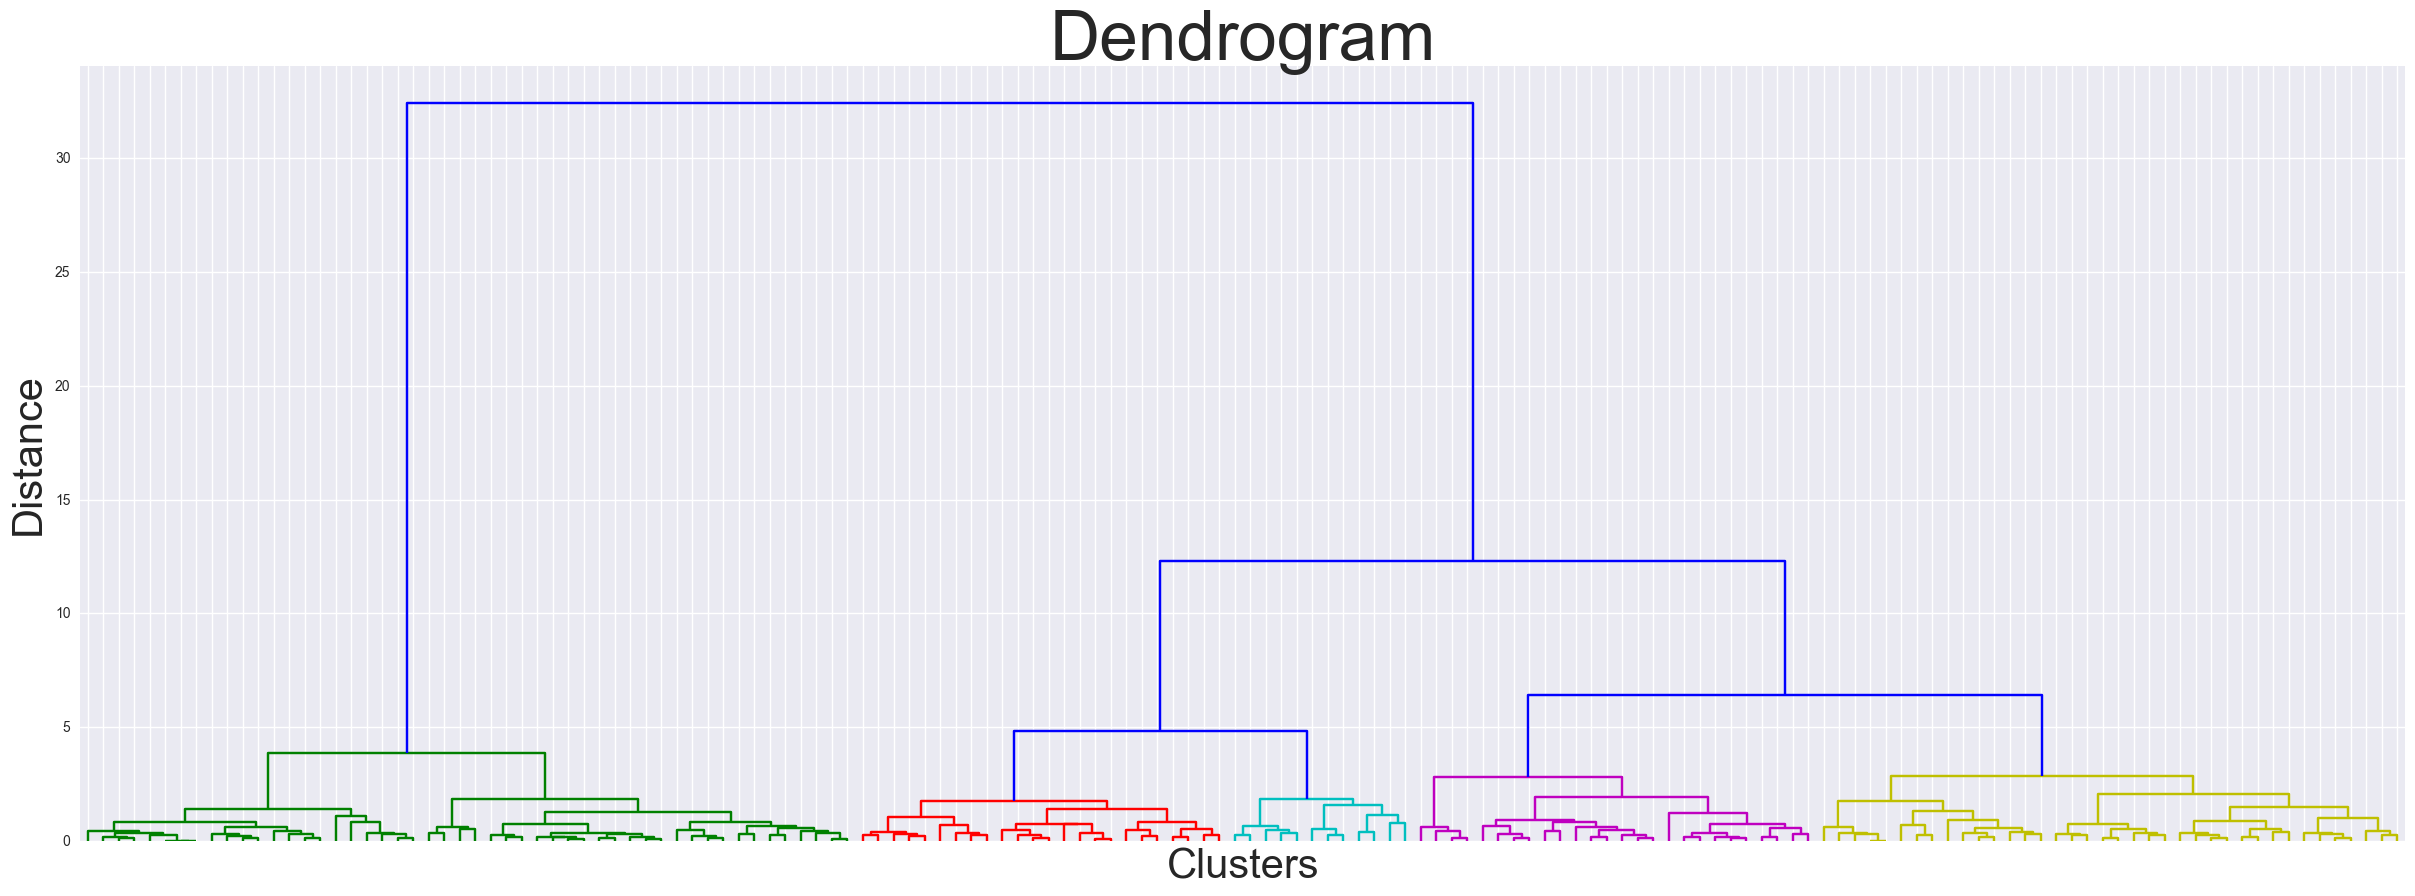

In [10]:
## Plotting of the Dendrogram 
plt.figure(figsize=(30, 10))
plt.title('Dendrogram',fontsize=50)
plt.xlabel('Clusters',fontsize=30)
plt.ylabel('Distance',fontsize=30)
dendrogram(Z,
           leaf_rotation=0.,
           leaf_font_size=18.,
           color_threshold = 4)
## Remove the X-ticks as they are fairly meaningless
plt.tick_params(
    axis='x',       
    which='both',   
    bottom='off',     
    top='off',         
    labelbottom='off')
plt.show()

In [11]:
## This Dendrogram is a bit squished so I will truncate it below, cutting off the lower levels.

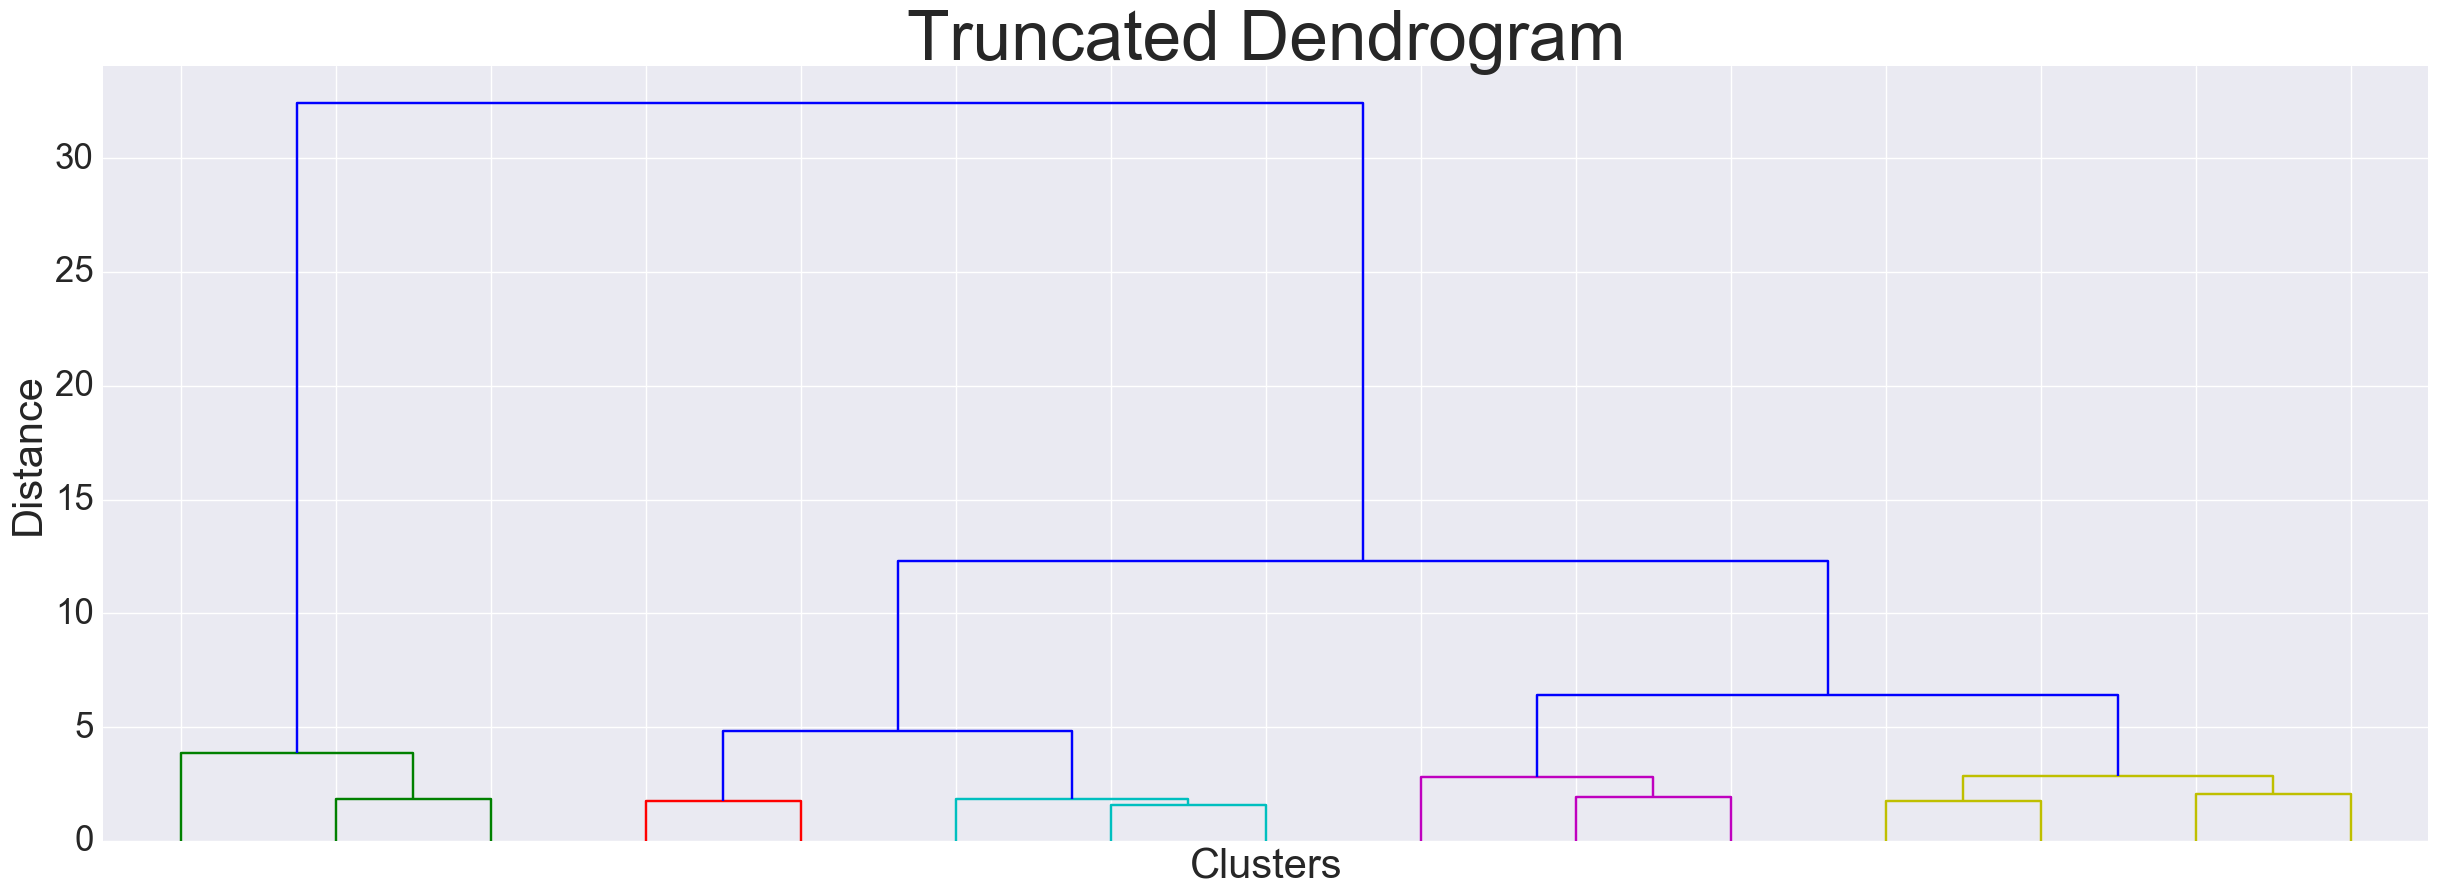

In [12]:
plt.figure(figsize=(30, 10))
plt.title('Truncated Dendrogram',fontsize=50)
plt.xlabel('Clusters',fontsize=30)
plt.ylabel('Distance',fontsize=30)
dendrogram(
    Z,
    leaf_rotation=0.,
    truncate_mode='lastp',  
    p=15,  
    leaf_font_size=18.,
    color_threshold = 4)
## Remove the X-ticks as they are fairly meaningless
plt.tick_params(
    axis='x',       
    which='both',   
    bottom='off',     
    top='off',         
    labelbottom='off')
plt.yticks(fontsize=25.)
plt.show()

In [13]:
## It is clear from the Dendrogram that there are 3 defined clusters, I will set the cut off distance to 10, 
## which should give me the three clusters and the apppriate labels.
max_d = 10
clusters = fcluster(Z, max_d, criterion='distance')

In [14]:
## I will add the clusters labels to the original DataFrame for ease of plotting.
X['Clusters']=clusters
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


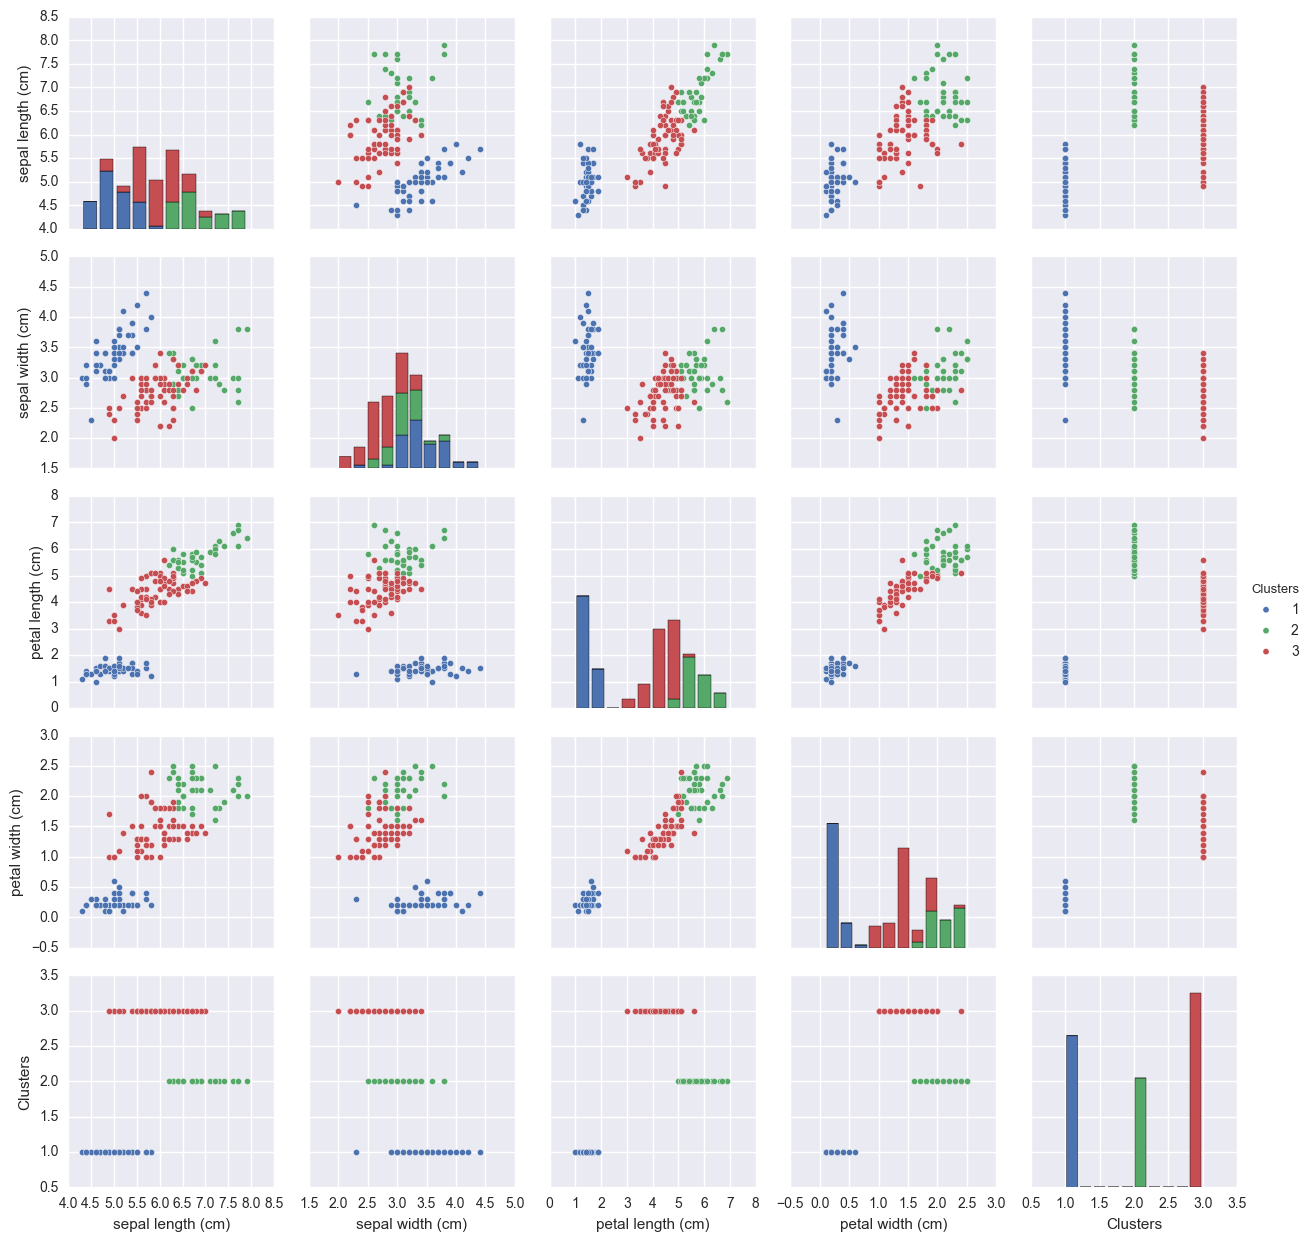

In [15]:
sns.pairplot(X,hue='Clusters',kind='scatter')

In [16]:
## It is visibile that the clusters have sucessfully grouped the data, this is visible in the petal length charts, 
## there is a slight overlap between clusters 2 and 3 but this was expected based on the intial plot.

## Although clustering is not a classification method or used for predictions I will briefly compare the results 
## of the clustering to the real classifcations as this may be interesting.

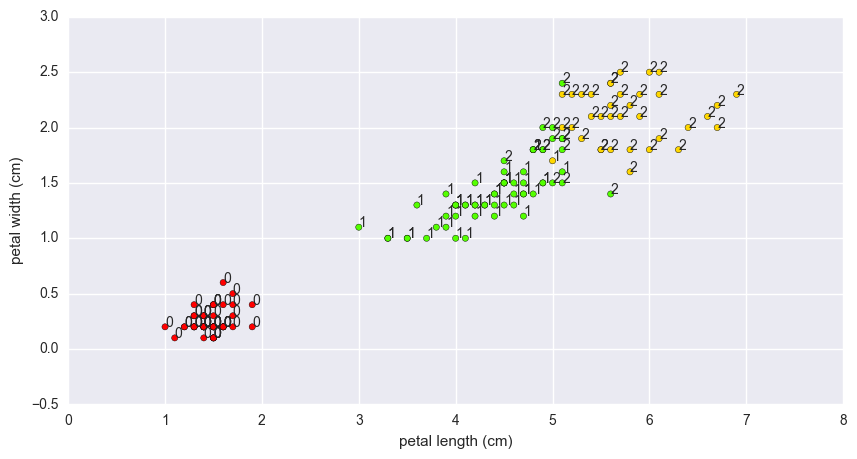

In [17]:
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(111)
ax1.scatter(X['petal length (cm)'], X['petal width (cm)'], c=clusters, cmap='prism')
ax1.set_xlabel('petal length (cm)')
ax1.set_ylabel('petal width (cm)')
for x in range(len(X)):
    ax1.annotate(data.target[x],(X['petal length (cm)'][x],X['petal width (cm)'][x]))

In [18]:
## For this dataset clustering proves to be quite accurate when compared to the original classification.

In [19]:
# Import Training and Test Digit Data
Train_Df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)
Test_Df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)

In [20]:
#Quick check of what the train data looks like.
Train_Df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,1,6,15,12,1,0,0,0,7,...,0,0,0,6,14,7,1,0,0,0
1,0,0,10,16,6,0,0,0,0,7,...,0,0,0,10,16,15,3,0,0,0
2,0,0,8,15,16,13,0,0,0,1,...,0,0,0,9,14,0,0,0,0,7
3,0,0,0,3,11,16,0,0,0,0,...,0,0,0,0,1,15,2,0,0,4
4,0,0,5,14,4,0,0,0,0,0,...,0,0,0,4,12,14,7,0,0,6


In [21]:
#Quick check of what the test data looks like.
Test_Df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


In [22]:
## I will describe the data to get a sense of the size and variaton of each of the features to check to see if I 
## need to apply any scaling, I also want to check what the target column should be.
Train_Df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,3823.0,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,...,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000,3823.000000
mean,0.0,0.301334,5.481821,11.805912,11.451478,5.505362,1.387392,0.142297,0.002093,1.960502,...,0.148313,0.000262,0.283024,5.855872,11.942977,11.461156,6.700497,2.105676,0.202197,4.497253
std,0.0,0.866986,4.631601,4.259811,4.537556,5.613060,3.371444,1.051598,0.088572,3.052353,...,0.767761,0.016173,0.928046,4.980012,4.334508,4.991934,5.775815,4.028266,1.150694,2.869831
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,10.000000,9.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,5.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.000000,13.000000,13.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,10.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,5.000000,15.000000,...,12.000000,1.000000,10.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [23]:
## Column 0 is empty so I will remove it, the rest of the columns seem to range from 0-16 so they will not need to 
## be scaled, the last column ranges from 0-9 so I will assume that this is the target column.

In [24]:
## Repeating the process as above
Test_Df.describe()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [25]:
## The assumptions above apply to the test data.

In [26]:
## Dropping the 0 and the target column to create the feature matrix
X_train=Train_Df.drop([0,64],axis=1)
X_test=Test_Df.drop([0,64],axis=1)
## Creating the target
y_train=Train_Df[64]
y_test=Test_Df[64]

In [71]:
## The first classifier I will use will be random forests. As the data is unlikely to be very linear, 
## I would assume that this classifer would perform quite well. Random forests is a ensemble machine learning method,
## it uses a bagging/bootstrapping approach and creates a large amount of decison trees and essentially averaging 
## the results (dependant on the hyper-perameter) of the group. As opposed to Decision tress it breaks the feature 
## space randomly, minimising overfit, which is a significant issue for decision tree models. Tree ensembles also have 
## the benefit of dealing with missing data at lot better then other models, however this is not an issue here.
Rft = RandomForestClassifier()
Rft_model=Rft.fit(X_train,y_train)
y_pred_Rft=Rft_model.predict(X_test)
print 'Random Forest Classifier'
print '-----------------------------------'
print 'Training Accuracy:',Rft_model.score(X_train,y_train)
print '-----------------------------------'
print 'Testing Accuracy:',Rft_model.score(X_test,y_test)
print '-----------------------------------'
print 'F1 Score:',f1_score(y_test,y_pred_Rft,average='weighted')
print '-----------------------------------'
print 'Confusion Matrix:'
print confusion_matrix(y_test,y_pred_Rft)

Random Forest Classifier
-----------------------------------
Training Accuracy: 0.999476850641
-----------------------------------
Testing Accuracy: 0.94713411241
-----------------------------------
F1 Score: 0.946954952854
-----------------------------------
Confusion Matrix:
[[177   1   0   0   0   0   0   0   0   0]
 [  0 179   0   0   0   0   0   0   1   2]
 [  0   6 171   0   0   0   0   0   0   0]
 [  0   0   2 168   0   1   0   4   4   4]
 [  0   1   0   0 179   0   0   1   0   0]
 [  1   0   0   2   2 175   1   0   1   0]
 [  2   2   0   0   1   0 176   0   0   0]
 [  0   0   0   0   3   3   0 162   3   8]
 [  1   9   3   1   1   0   0   1 154   4]
 [  0   0   0   9   0   5   0   2   3 161]]


In [ ]:
## The random forest classifier has performed well, there is a bit of a drop between the training and test set, 
## this could be improved upon with the use of cross validation. From the confusion matrix it is evedent that the model 
## especially struggled with over classifying the number 1 this is unsuprising as any hand written numbers where the 
## loops such as 8,9 or 6 may be closed or the horizontal bar on the 7 may be too short for the classifier to  
## effecivly recognise the number. Other numbers that may be mixed up are 8s and 3s and 9s and 7s.

In [72]:
## K-nearest-neighbors classifier is a model that finds the nearest n data point to the data it is trying to predict, 
## and applies the class of these data points to it. If there are equidistant points, or an even number in the n, a
## voting system is used to determine the class. N is a hyper-parameter chosen by the user.
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
print 'K Nearest Neighbors Classifier'
print '-----------------------------------'
print 'Training Accuracy:',knn_model.score(X_train,y_train)
print '-----------------------------------'
print 'Testing Accuracy:',knn_model.score(X_test,y_test)
print '-----------------------------------'
print 'F1 Score:',f1_score(y_test,y_pred_knn,average='weighted')
print '-----------------------------------'
print 'Confusion Matrix:'
print confusion_matrix(y_test,y_pred_knn)

K Nearest Neighbors Classifier
-----------------------------------
Training Accuracy: 0.989537012817
-----------------------------------
Testing Accuracy: 0.978853644964
-----------------------------------
F1 Score: 0.978867659516
-----------------------------------
Confusion Matrix:
[[178   0   0   0   0   0   0   0   0   0]
 [  0 181   0   0   0   0   1   0   0   0]
 [  0   3 174   0   0   0   0   0   0   0]
 [  0   1   0 178   0   1   0   1   2   0]
 [  0   1   0   0 179   0   0   0   1   0]
 [  0   0   0   0   1 180   0   0   0   1]
 [  0   0   0   0   0   1 180   0   0   0]
 [  0   0   0   0   0   0   0 173   1   5]
 [  0   8   0   2   0   1   0   0 162   1]
 [  0   0   0   2   1   1   0   0   2 174]]


In [ ]:
## Again the  Knn model performed very well and as expected numbers such as 8&3 and 7&9 have been mixed up by the 
## model as can be seen by the confusion matrix. The model performed the best by both the f1 score and accuracy 
## metrics.

In [64]:
## The true numbers that have been incorrectly labeled are listed below by their frequency.
Restults = pd.DataFrame({"Test":y_test,'Train':y_pred_knn})
test.Test[test.Test!=test.Train].value_counts()

8    12
9     6
7     6
3     5
2     3
5     2
4     2
6     1
1     1
Name: Test, dtype: int64

In [73]:
## Support vectors classifier is that models each of the data points in space, it then searches for the best spaces
## in which to break up the data. It generally performs well with data that has a large number of features, it 
svc = SVC(kernel='linear')
svc_model=svc.fit(X_train,y_train)
y_pred_svc=svc_model.predict(X_test)
print 'Support Vector Classifier'
print '-----------------------------------'
print 'Training Accuracy:',svc_model.score(X_train,y_train)
print '-----------------------------------'
print 'Testing Accuracy:',svc_model.score(X_test,y_test)
print '-----------------------------------'
print 'F1 Score:',f1_score(y_test,y_pred_svc,average='weighted')
print '-----------------------------------'
print 'Confusion Matrix:'
print confusion_matrix(y_test,y_pred_svc)

Support Vector Classifier
-----------------------------------
Training Accuracy: 1.0
-----------------------------------
Testing Accuracy: 0.961046188091
-----------------------------------
F1 Score: 0.960949894351
-----------------------------------
Confusion Matrix:
[[177   0   0   0   0   1   0   0   0   0]
 [  0 178   0   0   0   0   3   0   1   0]
 [  0   7 170   0   0   0   0   0   0   0]
 [  1   0   5 171   0   2   0   2   1   1]
 [  0   0   0   0 180   0   0   0   1   0]
 [  0   0   1   0   0 180   0   0   0   1]
 [  0   0   0   0   1   0 179   0   1   0]
 [  0   0   0   0   1   7   0 165   0   6]
 [  0   9   1   5   0   2   0   0 157   0]
 [  1   0   0   4   1   3   0   0   1 170]]


In [ ]:
## I will perform a grid search with cross validation on the SVC model in order to find a more optimum 
## set of parameters, as with such a high training score it is possible the model was slightly overfit.

In [41]:
parameters={'C':[0.001,0.01,0.1,1.0,10,30,100],
           'gamma':['auto',0.1,1,10],
           'kernel':['linear','rbf']}
gs_svc = GridSearchCV(svc,
                  param_grid=parameters, 
                  verbose=True, 
                  cv=5, 
                  scoring='accuracy')
gs_svc.fit(X_train, y_train)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  8.0min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.001, 0.01, 0.1, 1.0, 10, 30, 100], 'gamma': ['auto', 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=True)

In [75]:
y_pred_svc_gs=gs_svc.predict(X_test)
print 'Support Vector Classifier'
print '-----------------------------------'
print 'Training Accuracy:',gs_svc.score(X_train,y_train)
print '-----------------------------------'
print 'Testing Accuracy:',gs_svc.score(X_test,y_test)
print '-----------------------------------'
print 'F1 Score:',f1_score(y_test,y_pred_svc_gs,average='weighted')
print '-----------------------------------'
print 'Confusion Matrix:'
print confusion_matrix(y_test,y_pred_svc_gs)

Support Vector Classifier
-----------------------------------
Training Accuracy: 0.990060162176
-----------------------------------
Testing Accuracy: 0.963828603228
-----------------------------------
F1 Score: 0.963835007209
-----------------------------------
Confusion Matrix:
[[177   0   0   0   1   0   0   0   0   0]
 [  0 179   0   0   0   0   0   0   2   1]
 [  0   6 171   0   0   0   0   0   0   0]
 [  1   0   4 168   0   3   0   3   2   2]
 [  0   0   0   0 179   0   0   0   2   0]
 [  0   0   0   0   0 180   0   0   0   2]
 [  0   0   0   0   1   0 179   0   1   0]
 [  0   0   0   0   1   5   0 166   0   7]
 [  0   8   0   0   0   1   0   0 159   6]
 [  0   0   0   1   2   3   0   0   0 174]]


In [ ]:
## My grid search has improved slightly on my SVC score however it still remains less accurate then the KNN model. 
## Again the SVC has suffered from over classifying the 1s category.

## Overall the KNN model has performed the best with all the metrics looked at. Given a bit more time I would have 
## had a look at tuning all of the models a bit further as well as trying some others out.